In [13]:
pip install statsmodels --upgrade

     |████████████████████████████████| 9.5 MB 1.5 MB/s eta 0:00:01
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.11.1
    Uninstalling statsmodels-0.11.1:
      Successfully uninstalled statsmodels-0.11.1
You should consider upgrading via the '/Users/rich/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
import statsmodels.api as sm 
from statsmodels.tsa.stattools import adfuller 
from statsmodels.stats.diagnostic import acorr_ljungbox 
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.arima_model import ARIMA 
from statsmodels.tsa.arima_model import ARMA 
from statsmodels.stats.stattools import durbin_watson 
from statsmodels.graphics.api import qqplot 

from sklearn.metrics import mean_squared_error

from statsmodels.tsa.statespace.sarimax import SARIMAX


In [3]:
data=pd.read_csv("/Users/rich/PycharmProjects/GDP_forecast/YEAR.csv")
data=data.drop(['Series Name', 'Series Code', 'Country Code'],axis=1)
data=data.drop([5,6,7,8,9],axis=0)
data.set_index('Country Name', inplace=True)
df=data.T
year=pd.period_range('1971','2019',freq='Y')
df.index= year
print(df)

Country Name  United States      China     Japan   Germany     India
1971               3.293362   7.060000  4.698992  3.132700  1.642930
1972               5.258895   3.810000  8.413547  4.300341 -0.553301
1973               5.645719   7.760000  8.032600  4.777487  3.295521
1974              -0.540547   2.310000 -1.225240  0.890069  1.185336
1975              -0.205464   8.720000  3.091576 -0.866739  9.149912
1976               5.388139  -1.570000  3.974984  4.949258  1.663104
1977               4.624159   7.570000  4.390338  3.347218  7.254765
1978               5.535303  11.325978  5.271942  3.008493  5.712532
1979               3.166150   7.591325  5.484042  4.150363 -5.238183
1980              -0.256752   7.834145  2.817591  1.408829  6.735822
1981               2.537719   5.112761  4.209336  0.529241  6.006204
1982              -1.802874   9.017114  3.312457 -0.394841  3.475733
1983               4.583927  10.770203  3.523045  1.572410  7.288893
1984               7.236620  15.19

In [10]:
print((df.isnull()).sum())

Country Name
United States    0
China            0
Japan            0
Germany          0
India            0
dtype: int64


In [11]:
# def resampling():
#     train = df['1971':'2010'] 
#     test = df['2010':'2019']
#     data_train = train.resample('Y').mean()  
#     data_test = test.resample('Y').mean()
 
#     return data_train,data_test


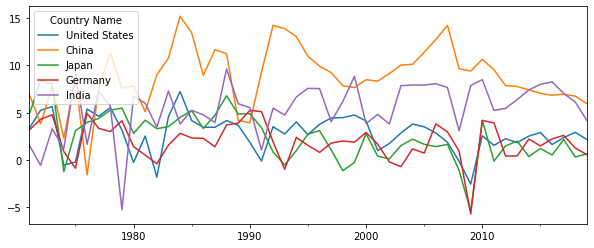

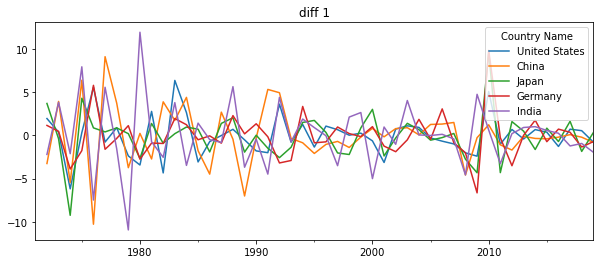

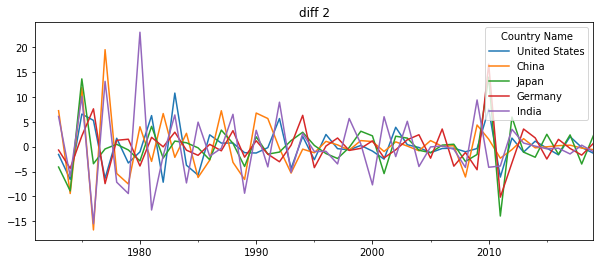

In [30]:
def stationarity(timeseries): 
    diff1 = timeseries.diff(1)
    diff2 = diff1.diff(1) 
    
    df.plot(figsize=(10,4))
    diff1.plot(title='diff 1',figsize=(10,4))
    diff2.plot(title='diff 2',figsize=(10,4))
stationarity(df)

In [7]:
diff1=df.diff(1)[1:].dropna()
diff2 = diff1.diff(1)[1:].dropna()
print('diff1 ADF test:')
for i in diff1.columns:
    print(i,adfuller(diff1[i]))
print('diff2 ADF test:')    
for i in diff2.columns:
    print(i,adfuller(diff2[i]))
    

diff1 ADF test:
United States (-4.078105082804295, 0.0010524578531302235, 9, 38, {'1%': -3.6155091011809297, '5%': -2.941262357486514, '10%': -2.6091995013850418}, 151.259380560075)
China (-2.669654419360187, 0.07943818230114952, 10, 37, {'1%': -3.6209175221605827, '5%': -2.9435394610388332, '10%': -2.6104002410518627}, 163.31710648399462)
Japan (-8.235912299349641, 5.891054658748848e-13, 1, 46, {'1%': -3.5812576580093696, '5%': -2.9267849124681518, '10%': -2.6015409829867675}, 164.61419294177887)
Germany (-6.018841199307508, 1.5107262242591537e-07, 4, 43, {'1%': -3.5925042342183704, '5%': -2.931549768951162, '10%': -2.60406594375338}, 162.2976483155856)
India (-4.697045287302362, 8.523489355615182e-05, 9, 38, {'1%': -3.6155091011809297, '5%': -2.941262357486514, '10%': -2.6091995013850418}, 161.94395396602775)
diff2 ADF test:
United States (-4.842241909210858, 4.512085354963062e-05, 9, 37, {'1%': -3.6209175221605827, '5%': -2.9435394610388332, '10%': -2.6104002410518627}, 149.52388363

In [92]:
print('diff1 Ljung–Box test:')
for i in df.columns:
    p_value = acorr_ljungbox(diff1[i], lags=1)
    print(i,p_value)
print('diff2 Ljung–Box test:')
for i in df.columns:
    p_value = acorr_ljungbox(diff2[i], lags=1)
    print(i,p_value)

diff1 Ljung–Box test:
United States (array([2.72050487]), array([0.09906668]))
China (array([6.13568244]), array([0.01324804]))
Japan (array([6.70225851]), array([0.00962909]))
Germany (array([3.27782075]), array([0.07022211]))
India (array([14.97735725]), array([0.00010881]))
diff2 Ljung–Box test:
United States (array([12.68070883]), array([0.00036945]))
China (array([19.65698449]), array([9.26639803e-06]))
Japan (array([15.43740885]), array([8.52832382e-05]))
Germany (array([10.89071312]), array([0.00096648]))
India (array([22.78900661]), array([1.80796956e-06]))


/Users/rich/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/Users/rich/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/Users/rich/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/Users/rich/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/Users/rich/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


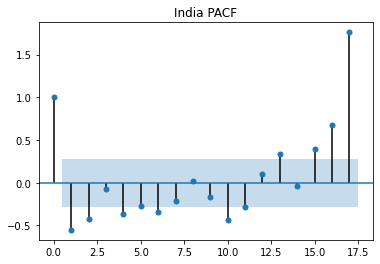

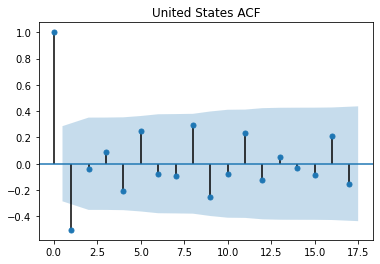

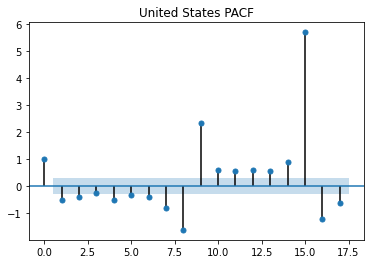

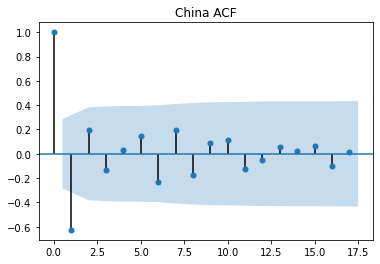

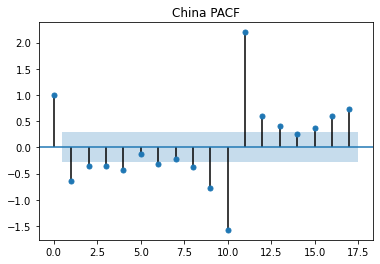

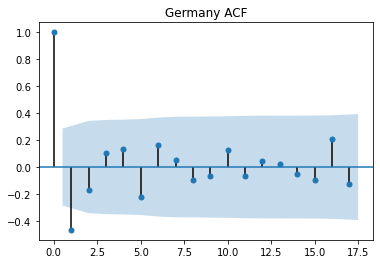

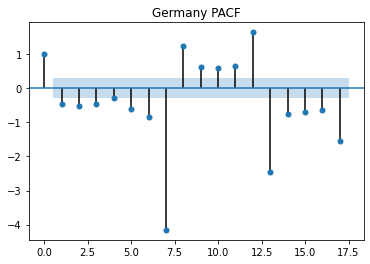

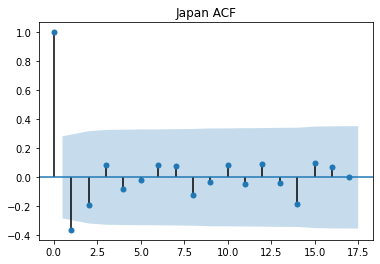

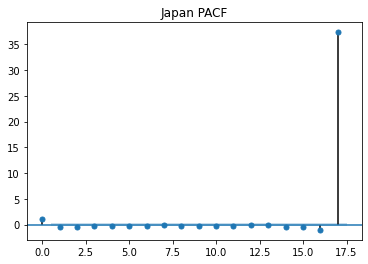

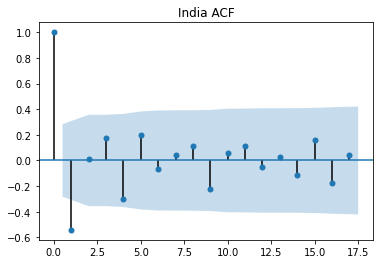

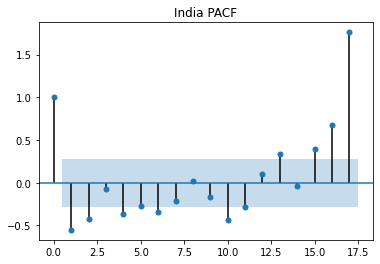

In [128]:
plot_acf(diff2['United States'],title='United States ACF') 
plot_pacf(diff2['United States'],title='United States PACF')
plot_acf(diff2['China'],title='China ACF') 
plot_pacf(diff2['China'],title='China PACF')
plot_acf(diff2['Germany'],title='Germany ACF') 
plot_pacf(diff2['Germany'],title='Germany PACF')

plot_acf(diff1['Japan'],title='Japan ACF') 
plot_pacf(diff1['Japan'],title='Japan PACF')
plot_acf(diff1['India'],title='India ACF') 
plot_pacf(diff1['India'],title='India PACF')


In [184]:
AIC = sm.tsa.arma_order_select_ic(diff2['United States'],max_ar=5,max_ma=5,ic='aic')['aic_min_order']
print(AIC)
AIC = sm.tsa.arma_order_select_ic(diff2['China'],max_ar=5,max_ma=5,ic='aic')['aic_min_order']
print(AIC)
AIC = sm.tsa.arma_order_select_ic(diff2['Germany'],max_ar=5,max_ma=5,ic='aic')['aic_min_order']
print(AIC)
AIC = sm.tsa.arma_order_select_ic(diff1['Japan'],max_ar=5,max_ma=5,ic='aic')['aic_min_order']
print(AIC)
AIC = sm.tsa.arma_order_select_ic(diff1['India'],max_ar=5,max_ma=5,ic='aic')['aic_min_order']
print(AIC)

/Users/rich/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/rich/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:728: RuntimeWarning: invalid value encountered in log
  invmacoefs = 

(0, 3)


/Users/rich/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/rich/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/rich/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/rich/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/rich/opt/anaconda3/lib/python3.8/site-packages/statsmodels/ba

(2, 5)


/Users/rich/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/rich/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/rich/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/rich/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/rich/opt/anaconda3/lib/python3.8/site-packages/statsmodels

(2, 2)


/Users/rich/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/rich/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/rich/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/rich/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/rich/opt/anaconda3/lib/python3.8/site-packages/statsmodels/ba

(0, 1)


/Users/rich/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/rich/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/rich/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/rich/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/rich/opt/anaconda3/lib/python3.8/site-packages/statsmodels/ba

(3, 5)


In [4]:
def ARIMA_model_2(country,train,order):
    arima_model = ARIMA(train,order)
    result = arima_model.fit()
    print(result.summary())
    pred = result.predict()
    forecast=result.forecast(9)
    diff2a=diff2[country]
    diff2b=diff2a['1973':'2010']
    pred.plot()
    diff2b.plot()
    print(forecast)
    print(diff2b)
    print('std:{}'.format(mean_squared_error(diff2b,pred)))
    resid = result.resid 
#   qqplot
    plt.figure(figsize=(12,8))
    qqplot(resid,line='q',fit=True)
#   D-W test
    print('D-W test:{}'.format(durbin_watson(resid.values)))
    
def ARIMA_model_1(country,train,order):
    arima_model = ARIMA(train,order)
    result = arima_model.fit()
    print(result.summary())
    result = arima_model.fit()
    pred = result.predict()
    forecast=result.forecast(9)
    diff1a=diff1[country]
    diff1b=diff1a['1972':'2010']
    pred.plot()
    diff1b.plot()
    print(forecast)
    print(diff1b)
    print('std:{}'.format(mean_squared_error(diff1b,pred)))
    resid = result.resid 
#   qqplot
    plt.figure(figsize=(12,8))
    qqplot(resid,line='q',fit=True)
#   D-W test
    print('D-W test:{}'.format(durbin_watson(resid.values)))



2010    2.563767
2011    1.550836
2012    2.249546
2013    1.842081
2014    2.525973
2015    2.908022
2016    1.637838
2017    2.369801
2018    2.927326
2019    2.161176
Freq: A-DEC, Name: United States, dtype: float64


/Users/rich/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:       D2.United States   No. Observations:                   38
Model:                 ARIMA(0, 2, 3)   Log Likelihood                 -85.288
Method:                       css-mle   S.D. of innovations              2.017
Date:                Fri, 04 Jun 2021   AIC                            180.577
Time:                        11:56:50   BIC                            188.765
Sample:                    12-31-1973   HQIC                           183.490
                         - 12-31-2010                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0061      0.006     -0.982      0.326      -0.018       0.006
ma.L1.D2.United States    -1.5834      0.209     -7.588      0.000      -1.992      -1.174
ma.L

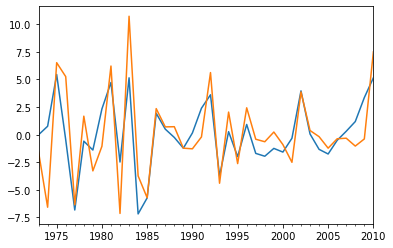

<Figure size 864x576 with 0 Axes>

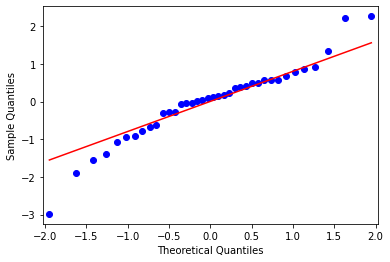

In [8]:
train = df['1971':'2010'] 
test = df['2010':'2019']
print(test['United States'])
data_train = train.resample('Y').mean()  
data_test = test.resample('Y').mean()
ARIMA_model_2(country='United States',train=train['United States'],order=(0,2,3))



/Users/rich/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/rich/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_p

                             ARIMA Model Results                              
Dep. Variable:               D2.China   No. Observations:                   38
Model:                 ARIMA(0, 2, 5)   Log Likelihood                 -99.990
Method:                       css-mle   S.D. of innovations              2.658
Date:                Sun, 30 May 2021   AIC                            213.980
Time:                        22:10:20   BIC                            225.443
Sample:                    12-31-1973   HQIC                           218.058
                         - 12-31-2010                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0149      0.008     -1.898      0.058      -0.030       0.000
ma.L1.D2.China    -1.5379      0.454     -3.390      0.001      -2.427      -0.649
ma.L2.D2.China     0.2383      0.301

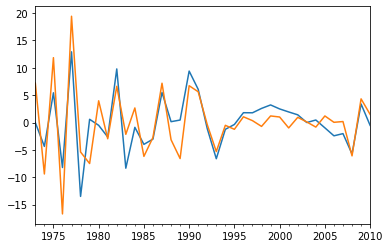

<Figure size 864x576 with 0 Axes>

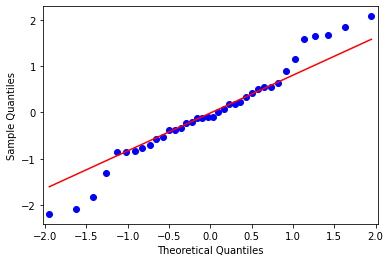

In [249]:
ARIMA_model_2(country='China',train=train['China'],order=(0,2,5))

/Users/rich/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:             D2.Germany   No. Observations:                   38
Model:                 ARIMA(0, 2, 2)   Log Likelihood                 -86.516
Method:                       css-mle   S.D. of innovations              2.047
Date:                Sun, 30 May 2021   AIC                            181.033
Time:                        22:04:49   BIC                            187.583
Sample:                    12-31-1973   HQIC                           183.363
                         - 12-31-2010                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0030      0.005     -0.641      0.521      -0.012       0.006
ma.L1.D2.Germany    -1.9909      0.123    -16.154      0.000      -2.232      -1.749
ma.L2.D2.Germany     0.9992 

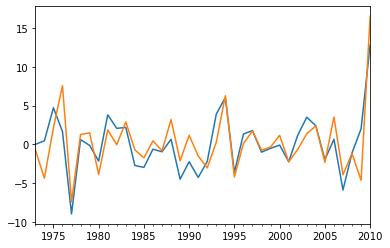

<Figure size 864x576 with 0 Axes>

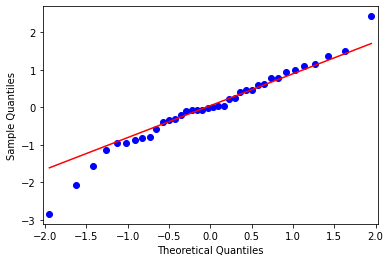

In [244]:
ARIMA_model_2(country='Germany',train=train['Germany'],order=(0,2,2))

/Users/rich/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/rich/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmod

                             ARIMA Model Results                              
Dep. Variable:                D.Japan   No. Observations:                   39
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -86.960
Method:                       css-mle   S.D. of innovations              2.146
Date:                Sun, 30 May 2021   AIC                            179.920
Time:                        22:17:22   BIC                            184.911
Sample:                    12-31-1972   HQIC                           181.711
                         - 12-31-2010                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1415      0.029     -4.814      0.000      -0.199      -0.084
ma.L1.D.Japan    -1.0000      0.077    -13.020      0.000      -1.151      -0.849
                                    Root

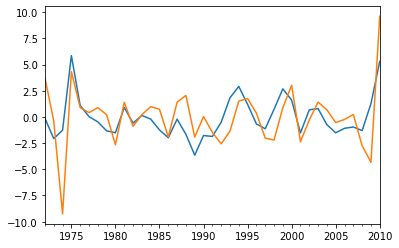

<Figure size 864x576 with 0 Axes>

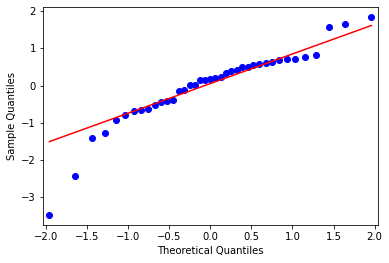

In [261]:
ARIMA_model_1(country='Japan',train=train['Japan'],order=(0,1,1))

/Users/rich/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/rich/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmod

                             ARIMA Model Results                              
Dep. Variable:                D.India   No. Observations:                   39
Model:                 ARIMA(3, 1, 0)   Log Likelihood                 -99.984
Method:                       css-mle   S.D. of innovations              3.111
Date:                Fri, 04 Jun 2021   AIC                            209.968
Time:                        11:57:00   BIC                            218.286
Sample:                    12-31-1972   HQIC                           212.952
                         - 12-31-2010                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1600      0.216      0.741      0.459      -0.263       0.583
ar.L1.D.India    -0.8198      0.159     -5.146      0.000      -1.132      -0.508
ar.L2.D.India    -0.4719      0.193     

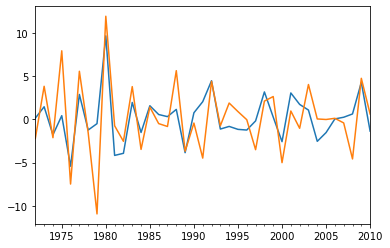

<Figure size 864x576 with 0 Axes>

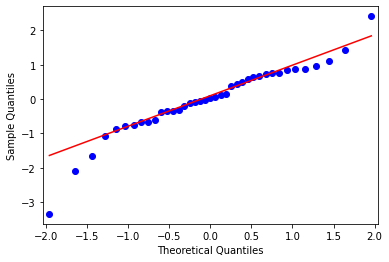

In [9]:
ARIMA_model_1(country='India',train=train['India'],order=(3,1,0))